In [64]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# 8.

Primera parte

In [65]:
def prior (a):
    if a == 1:
        return 0.5 #cara
    elif a == -1:
        return 0.5 #sello
    else:
        return None

digits = [-1,1]
combinations = list(product(digits, repeat=4))

com_ = []
for i in combinations:
    if sum(i) == 0:
        com_.append(i)
com_

[(-1, -1, 1, 1),
 (-1, 1, -1, 1),
 (-1, 1, 1, -1),
 (1, -1, -1, 1),
 (1, -1, 1, -1),
 (1, 1, -1, -1)]

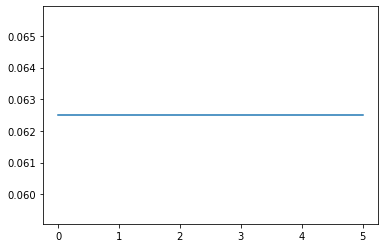

In [66]:
P = []
for i in com_:
    p = 1
    for j in i:
        p *= prior(j)
    P.append(p)

plt.plot(P)

In [67]:
p = sum(P)
p

0.375

In [68]:
3/8

0.375

Segunda parte

In [69]:
def GetSample(N = int(1e4), ncoins = 4, Weights=None):
    
    Sample = np.zeros((N,ncoins))
    
    Events = [-1,1]
    
    for i in range(N):
        
        if Weights == None:
            Exp = np.random.choice(Events,ncoins)
            
       # print(Exp)
        Sample[i] = Exp
        
    return Sample

N = int(1e5)
Sample = GetSample(N, ncoins = 4, Weights=None)
Sample

array([[ 1.,  1.,  1.,  1.],
       [-1., -1.,  1., -1.],
       [ 1., -1., -1.,  1.],
       ...,
       [-1.,  1.,  1., -1.],
       [-1., -1.,  1., -1.],
       [-1., -1., -1., -1.]])

In [70]:
FrecuenciasCaras = np.array([],dtype=np.int64)
FrecuenciasSellos = np.array([],dtype=np.int64)

for i in range(Sample.shape[0]):
    
    NCaras = 0
    NSellos = 0
    
    for j in range(Sample.shape[1]):
        
        if Sample[i,j] == 1:
            NCaras += 1
        if Sample[i,j] == -1:
            NSellos += 1
            
    FrecuenciasCaras = np.append(FrecuenciasCaras,NCaras)
    FrecuenciasSellos = np.append(FrecuenciasSellos,NSellos)

In [71]:
ii = np.where( FrecuenciasCaras == 2 )
EventsCaras = len(FrecuenciasCaras[ii])

pC = EventsCaras/N
pC

0.37415

In [72]:
ii = np.where( FrecuenciasSellos == 2 )
EventsSellos = len(FrecuenciasSellos[ii])

pS = EventsSellos/N
pS

0.37415

Dado que si en una lanzada de 4 monedas 2 son cara, Necesariamente las otras 2 son sello. Por lo tanto estamos hablando de una probabilidad condicionada.

P(AnB) = P(A/B)*P(B),  Sabemos que P(A/B) = 1.

In [75]:
P = 1 * pS
P

0.37415

In [74]:
3/8

0.375